In [1]:
import os
from matplotlib import pyplot as plt

In [2]:
def show_image_with_corners(image, coords, title="Corners detected"):
 plt.imshow(image, interpolation='nearest', cmap='gray')
 plt.title(title)
 plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
 plt.axis('off')
 plt.show()
def show_image(image, title='Image', cmap_type='gray',vmin=None,vmax=None):  
    plt.imshow(image, cmap=cmap_type,vmin=vmin,vmax=vmax)
    plt.title(title)  
    plt.axis('off')  
    plt.show()

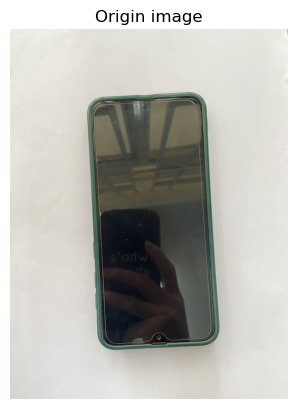

In [3]:
path = os.path.abspath(r'image/phone.jpg')
image = plt.imread(path)
show_image(image, "Origin image")

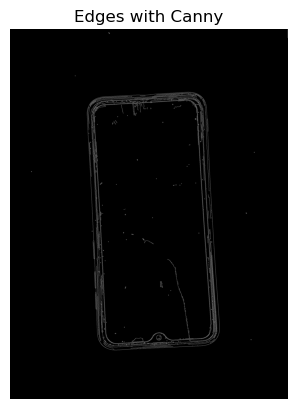

In [4]:
#bai 4.1
from skimage import color
# Tải các thư viện cần thiết
from skimage.feature import canny
# chuyển đổi ảnh thành ảnh xám
grayImage = color.rgb2gray(image)
# Áp dụng bộ lọc cạnh 
canny_edges = canny(grayImage)
# Hiển thị kết quả
show_image(canny_edges, "Edges with Canny")

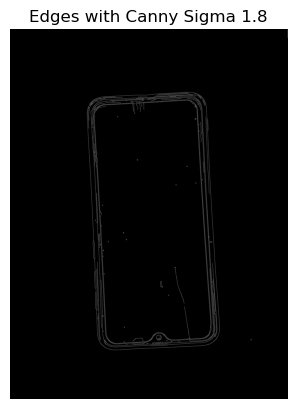

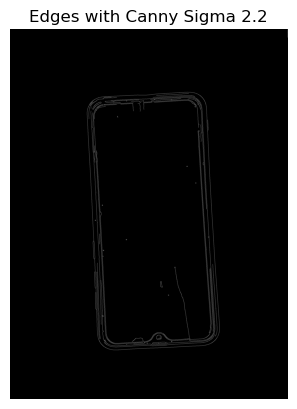

In [5]:
# Ứng dụng phát hiện cạnh với sigma =1.8
canny_edges_sigma18 = canny(grayImage, sigma=1.8)
show_image(canny_edges_sigma18, "Edges with Canny Sigma 1.8")
# Ứng dụng phát hiện cạnh với sigma =2.2
canny_edges_sigma22 = canny(grayImage, sigma=2.2)
show_image(canny_edges_sigma22, "Edges with Canny Sigma 2.2")

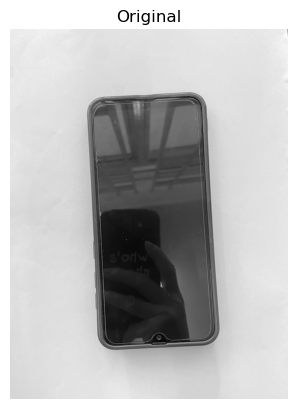

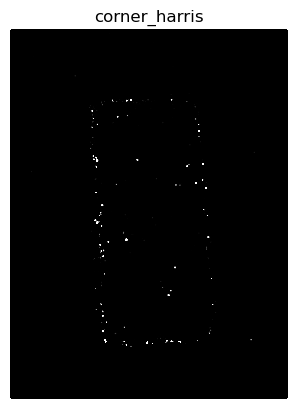

In [6]:
# Khai báo các thư viện cần thiết
from skimage.feature import corner_harris, corner_peaks


# Ứng dụng bộ lọc Harris để xác định các góc có khả năng:
measure_image = corner_harris(grayImage)

# Tìm đỉnh của các góc dựa trên đáp ứng của bộ lọc Harris 
#coords_corner_peaks = corner_peaks(corner_harris(grayImage), min_distance=50)
# Hiển thị kết quả và so sánh
show_image(grayImage, "Original")

show_image(measure_image, "corner_harris",vmin=0.00001,vmax=0.01)

#show_image(measure_image, "corner_peaks",vmin=70,vmax=120)
#show_image_with_corners(image, coords_corner_peaks)

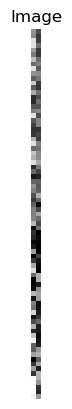

A total of 79 corners were detected.


In [7]:
# Tìm đỉnh của các góc dựa trên đáp ứng của bộ lọc Harris 
measure_image = measure_image -0.5
coords_corner_peaks = corner_peaks(measure_image, min_distance=100)
show_image(coords_corner_peaks)
print("A total of", len(coords_corner_peaks), "corners were detected.")


In [ ]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(grayImage)
print(thresh)
grayImage_binary = grayImage > thresh
show_image(grayImage_binary)
measure_image = corner_harris(grayImage)
print(measure_image)
coords_corner_peaks = corner_peaks(measure_image, min_distance=100)
show_image_with_corners(image, coords_corner_peaks)

In [ ]:
# Thay đổi tham số điều khiển min_distance và quan sát số lượng các góc có thể tìm được
coords_w_min_2 = 2(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")